# FLIGHT PRICE PREDICTION

# PROBLEM STATEMENT:--

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, and it will be a different story.

To solve this problem using which we aim to build a model which predicts the prices of the flights using various input features.

In [1]:
#Importing Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the datasets
train_df=pd.read_excel('Data_Train.xlsx')
test_df=pd.read_excel('Test_set.xlsx')

In [3]:
#displaying allthe columns
pd.set_option('display.max_columns', None)

In [4]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#checkhing no of rows and columns of the train_df dataframe
train_df.shape

(10683, 11)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
#Checking for the null values
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
#dropping the null values
train_df.dropna(axis=0,inplace=True)

In [9]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# DATA PRE-PROCESSING:-

In [11]:
#Date_of_journey
train_df['Date_of_Journey'].str.split('/').str[0]

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date_of_Journey, Length: 10682, dtype: object

In [12]:
train_df['journey_day']=pd.to_datetime(train_df['Date_of_Journey'],format='%d/%m/%Y').dt.day
train_df['journey_month']=pd.to_datetime(train_df['Date_of_Journey'],format='%d/%m/%Y').dt.month

train_df.drop('Date_of_Journey',axis=1,inplace=True)

In [13]:
train_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [14]:
#Dep_Time
train_df['Dep_Hour']=pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['Dep_Min']=pd.to_datetime(train_df['Dep_Time']).dt.minute


train_df.drop('Dep_Time',axis=1,inplace=True)

In [15]:
train_df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [16]:
#Duration
train_df['duration1']=train_df['Duration'].str.replace('h','').str.replace('m','')

In [17]:
train_df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Hour,Dep_Min,duration1
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,2 50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,7 25


In [18]:
train_df['duration_hr']=train_df['duration1'].str.split(' ').str[0]
train_df['duration_min']=train_df['duration1'].str.split(' ').str[1]

train_df.drop(['Duration','duration1'],axis=1,inplace=True)


In [19]:
train_df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,5,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,9,6,9,25,19,NaN


In [20]:
train_df['duration_min']=train_df['duration_min'].fillna(0)

In [21]:
train_df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,5,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,9,6,9,25,19,0


In [22]:
#Arrival_Time
train_df['Arrival_Time_hr']=pd.to_datetime(train_df['Arrival_Time']).dt.hour
train_df['Arrival_Time_min']=pd.to_datetime(train_df['Arrival_Time']).dt.minute


train_df.drop('Arrival_Time',axis=1,inplace=True)

In [23]:
train_df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min,Arrival_Time_hr,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,19,0,4,25


In [24]:
#Categorical Columns:-

In [25]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

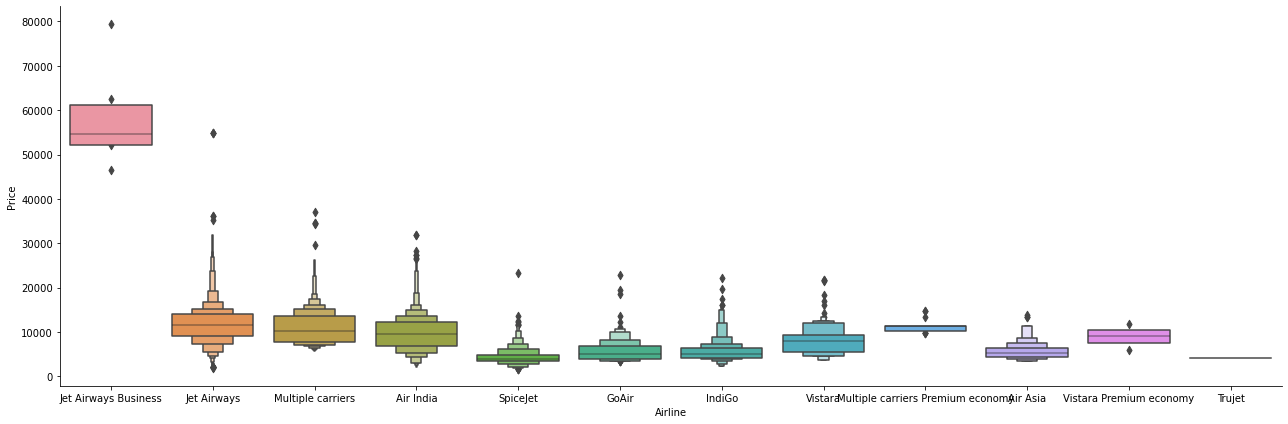

In [26]:
sns.catplot(x='Airline',y='Price',data=train_df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

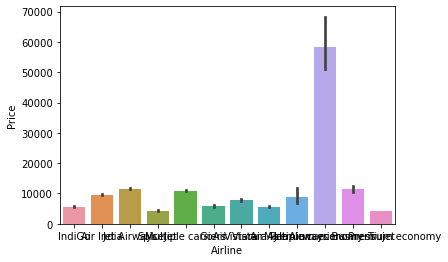

In [27]:
sns.barplot(x='Airline',y='Price',data=train_df)

In [28]:
 train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

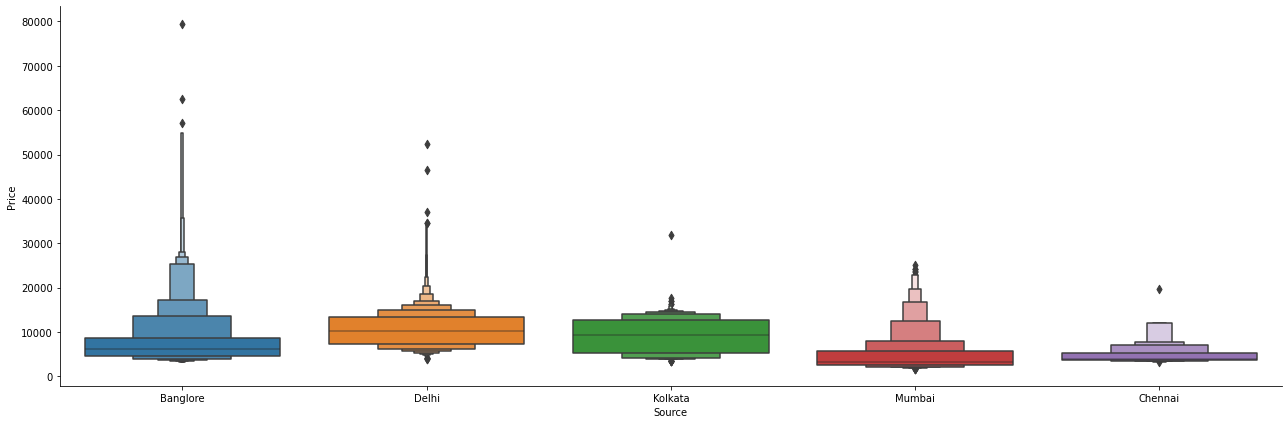

In [29]:
sns.catplot(x='Source',y='Price',data=train_df.sort_values(['Price'],ascending=False),kind='boxen',height=6,aspect=3)

<AxesSubplot:xlabel='Source', ylabel='Price'>

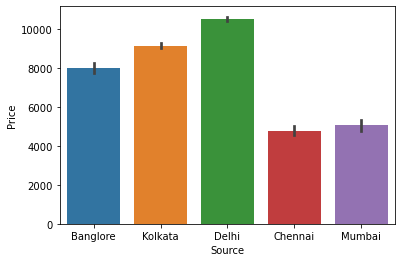

In [30]:
sns.barplot(x='Source',y='Price',data=train_df)

In [31]:
train_df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

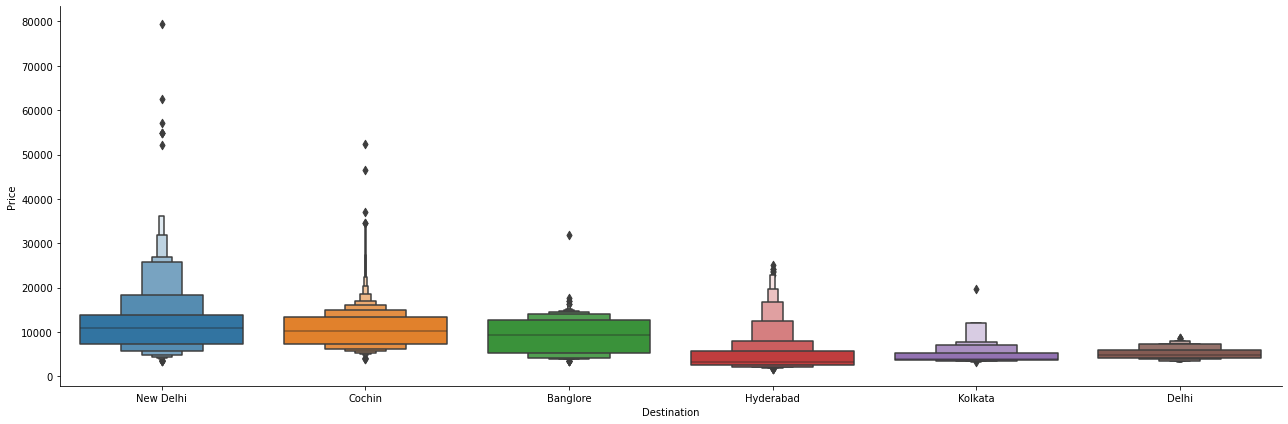

In [32]:
sns.catplot(x='Destination',y='Price',data=train_df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)

<AxesSubplot:xlabel='Destination', ylabel='Price'>

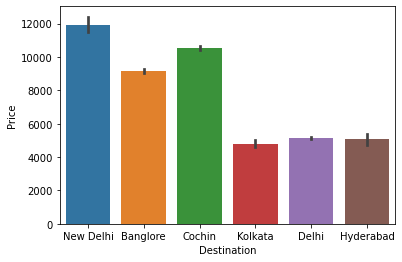

In [33]:
sns.barplot(x='Destination',y='Price',data=train_df)

In [34]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

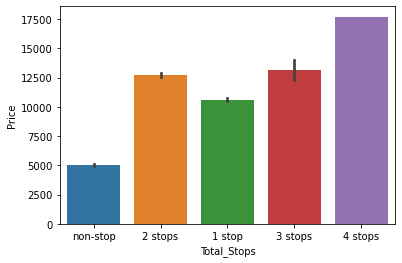

In [35]:
sns.barplot(x='Total_Stops',y='Price',data=train_df)

From here we can say that Airline,source,destination is an Nominal data as we can't diffentitae between diffent airways so we will be using a one hot encoing over here

For Total_stops we will be using labelencoder as it is Ordinal Data

In [36]:
#Performing one hot Encoding
one_hot_encoded_data = pd.get_dummies(data=train_df, columns = ['Airline','Source','Destination'],drop_first=True)
print(one_hot_encoded_data)

                       Route Total_Stops Additional_Info  Price  journey_day  \
0                  BLR → DEL    non-stop         No info   3897           24   
1      CCU → IXR → BBI → BLR     2 stops         No info   7662            1   
2      DEL → LKO → BOM → COK     2 stops         No info  13882            9   
3            CCU → NAG → BLR      1 stop         No info   6218           12   
4            BLR → NAG → DEL      1 stop         No info  13302            1   
...                      ...         ...             ...    ...          ...   
10678              CCU → BLR    non-stop         No info   4107            9   
10679              CCU → BLR    non-stop         No info   4145           27   
10680              BLR → DEL    non-stop         No info   7229           27   
10681              BLR → DEL    non-stop         No info  12648            1   
10682  DEL → GOI → BOM → COK     2 stops         No info  11753            9   

       journey_month  Dep_Hour  Dep_Min

In [37]:
#performing the map function
train_df['Total_Stops']=train_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [38]:
train_df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min,Arrival_Time_hr,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,19,0,4,25


In [39]:
#Concating the two data-Frames
train_df=pd.concat([train_df,one_hot_encoded_data],axis=1)

In [40]:
train_df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min,Arrival_Time_hr,Arrival_Time_min,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min,Arrival_Time_hr,Arrival_Time_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,2,50,1,10,BLR → DEL,non-stop,No info,3897,24,3,22,20,2,50,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,7,25,13,15,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,7,25,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,19,0,4,25,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,19,0,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [41]:
#dropping the columns
train_df.drop(['Airline','Source','Destination','Route'],axis=1,inplace=True)

In [42]:
train_df.head(3)

,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min,Arrival_Time_hr,Arrival_Time_min,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min,Arrival_Time_hr,Arrival_Time_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,No info,3897,24,3,22,20,2,50,1,10,non-stop,No info,3897,24,3,22,20,2,50,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,No info,7662,1,5,5,50,7,25,13,15,2 stops,No info,7662,1,5,5,50,7,25,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,No info,13882,9,6,9,25,19,0,4,25,2 stops,No info,13882,9,6,9,25,19,0,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [43]:
train_df.shape

(10682, 42)

In [44]:
train_df=train_df.loc[:, ~train_df.columns.duplicated()]

In [45]:
train_df.head()

,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min,Arrival_Time_hr,Arrival_Time_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,No info,3897,24,3,22,20,2,50,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,No info,7662,1,5,5,50,7,25,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,No info,13882,9,6,9,25,19,0,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,No info,6218,12,5,18,5,5,25,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,No info,13302,1,3,16,50,4,45,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
train_df.shape

(10682, 31)

In [47]:
#checking the value counts
train_df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [48]:
#creatin the dummies of 'Additional_Info' column
one_hot_encoded_data_2 = pd.get_dummies(data=train_df, columns = ['Additional_Info'],drop_first=True)

In [49]:
train_df=pd.concat([train_df,one_hot_encoded_data_2],axis=1)

In [50]:
train_df.head()

,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min,Arrival_Time_hr,Arrival_Time_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops,Price,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min,Arrival_Time_hr,Arrival_Time_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,No info,3897,24,3,22,20,2,50,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3897,24,3,22,20,2,50,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,2,No info,7662,1,5,5,50,7,25,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,7662,1,5,5,50,7,25,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,No info,13882,9,6,9,25,19,0,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,2,13882,9,6,9,25,19,0,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,No info,6218,12,5,18,5,5,25,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,6218,12,5,18,5,5,25,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,No info,13302,1,3,16,50,4,45,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13302,1,3,16,50,4,45,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [51]:
#Dropping the 'Additional_Info column' after dummy creation
train_df.drop('Additional_Info',axis=1,inplace=True)

In [52]:
train_df.shape

(10682, 69)

In [53]:
train_df=train_df.loc[:, ~train_df.columns.duplicated()]

In [54]:
train_df.shape

(10682, 39)

In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Total_Stops                                   10682 non-null  int64 
 1   Price                                         10682 non-null  int64 
 2   journey_day                                   10682 non-null  int64 
 3   journey_month                                 10682 non-null  int64 
 4   Dep_Hour                                      10682 non-null  int64 
 5   Dep_Min                                       10682 non-null  int64 
 6   duration_hr                                   10682 non-null  object
 7   duration_min                                  10682 non-null  object
 8   Arrival_Time_hr                               10682 non-null  int64 
 9   Arrival_Time_min                              10682 non-null  int64 
 10

In [56]:
train_df.columns

Index(['Total_Stops', 'Price', 'journey_day', 'journey_month', 'Dep_Hour',
       'Dep_Min', 'duration_hr', 'duration_min', 'Arrival_Time_hr',
       'Arrival_Time_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_

# TEST_DATA 

In [57]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [58]:
test_df.shape

(2671, 10)

In [59]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [60]:
test_df['journey_day']=pd.to_datetime(test_df['Date_of_Journey'],format='%d/%m/%Y').dt.day
test_df['journey_month']=pd.to_datetime(test_df['Date_of_Journey'],format='%d/%m/%Y').dt.month

test_df.drop('Date_of_Journey',axis=1,inplace=True)

In [61]:
test_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [62]:
test_df['Dep_Hour']=pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['Dep_Min']=pd.to_datetime(test_df['Dep_Time']).dt.minute

test_df.drop('Dep_Time',axis=1,inplace=True)

In [63]:
test_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_Hour,Dep_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [64]:
test_df['Duration1']=test_df['Duration'].str.replace('h','').str.replace('m','')

In [65]:
test_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_Hour,Dep_Min,Duration1
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,10 55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20,4
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15,23 45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0,13
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55,2 50


In [66]:
test_df['duration_hr']=test_df['Duration1'].str.split(' ').str[0]
test_df['duration_min']=test_df['Duration1'].str.split(' ').str[1]

In [67]:
test_df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_Hour,Dep_Min,Duration1,duration_hr,duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,10 55,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20,4,4,NaN
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15,23 45,23,45


In [68]:
test_df.drop(['Duration','Duration1'],axis=1,inplace=True)

In [69]:
test_df['duration_min'].fillna(0,inplace=True)

In [70]:
test_df.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,1 stop,No info,6,6,17,30,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,1 stop,No info,12,5,6,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,1 stop,In-flight meal not included,21,5,19,15,23,45


In [71]:
test_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Arrival_Time       0
Total_Stops        0
Additional_Info    0
journey_day        0
journey_month      0
Dep_Hour           0
Dep_Min            0
duration_hr        0
duration_min       0
dtype: int64

In [72]:
test_df['Arrival_Time_hr']=pd.to_datetime(test_df['Arrival_Time']).dt.hour
test_df['Arrival_Time_min']=pd.to_datetime(test_df['Arrival_Time']).dt.minute

test_df.drop('Arrival_Time',axis=1,inplace=True)

In [73]:
test_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min,Arrival_Time_hr,Arrival_Time_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,10,55,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,4,0,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,23,45,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,13,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,50,2,45


In [74]:
encoder= pd.get_dummies(data=test_df, columns = ['Airline','Source','Destination'],drop_first=True)

In [75]:
test_df['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [76]:
test_df['Total_Stops']=test_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [77]:
test_df=pd.concat([test_df,encoder],axis=1)

In [78]:
test_df.drop(['Airline','Source','Destination','Route'],axis=1,inplace=True)

In [79]:
test_df.head()

,Total_Stops,Additional_Info,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min,Arrival_Time_hr,Arrival_Time_min,Total_Stops,Additional_Info,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min,Arrival_Time_hr,Arrival_Time_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,No info,6,6,17,30,10,55,4,25,1 stop,No info,6,6,17,30,10,55,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,No info,12,5,6,20,4,0,10,20,1 stop,No info,12,5,6,20,4,0,10,20,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,In-flight meal not included,21,5,19,15,23,45,19,0,1 stop,In-flight meal not included,21,5,19,15,23,45,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,No info,21,5,8,0,13,0,21,0,1 stop,No info,21,5,8,0,13,0,21,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,No info,24,6,23,55,2,50,2,45,non-stop,No info,24,6,23,55,2,50,2,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [80]:
encoder1=pd.get_dummies(data=test_df,columns=['Additional_Info'],drop_first=True)

In [81]:
test_df=pd.concat([test_df,encoder1],axis=1)

In [82]:
test_df.head()

,Total_Stops,Additional_Info,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min,Arrival_Time_hr,Arrival_Time_min,Total_Stops,Additional_Info,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min,Arrival_Time_hr,Arrival_Time_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min,Arrival_Time_hr,Arrival_Time_min,Total_Stops,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min,Arrival_Time_hr,Arrival_Time_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info
0,1,No info,6,6,17,30,10,55,4,25,1 stop,No info,6,6,17,30,10,55,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,6,6,17,30,10,55,4,25,1 stop,6,6,17,30,10,55,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,1,No info,12,5,6,20,4,0,10,20,1 stop,No info,12,5,6,20,4,0,10,20,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,12,5,6,20,4,0,10,20,1 stop,12,5,6,20,4,0,10,20,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,1,In-flight meal not included,21,5,19,15,23,45,19,0,1 stop,In-flight meal not included,21,5,19,15,23,45,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,21,5,19,15,23,45,19,0,1 stop,21,5,19,15,23,45,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,1,No info,21,5,8,0,13,0,21,0,1 stop,No info,21,5,8,0,13,0,21,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,21,5,8,0,13,0,21,0,1 stop,21,5,8,0,13,0,21,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,No info,24,6,23,55,2,50,2,45,non-stop,No info,24,6,23,55,2,50,2,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,24,6,23,55,2,50,2,45,non-stop,24,6,23,55,2,50,2,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1


In [83]:
test_df.shape

(2671, 86)

In [84]:
test_df.drop('Additional_Info',axis=1,inplace=True)

In [85]:
test_df=test_df.loc[:, ~test_df.columns.duplicated()]

In [86]:
test_df.shape

(2671, 33)

In [87]:
test_df.columns

Index(['Total_Stops', 'journey_day', 'journey_month', 'Dep_Hour', 'Dep_Min',
       'duration_hr', 'duration_min', 'Arrival_Time_hr', 'Arrival_Time_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info'],
      dtype='object')

In [88]:
print(train_df.shape)
print(test_df.shape)

(10682, 39)
(2671, 33)


In [89]:
#Feature_Selection   

In [90]:
x=train_df.loc[:,['Total_Stops', 'journey_day', 'journey_month', 'Dep_Hour',
       'Dep_Min', 'duration_hr', 'duration_min', 'Arrival_Time_hr',
       'Arrival_Time_min', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_No info', 'Additional_Info_Red-eye flight']]

In [91]:
  x.head()

,Total_Stops,journey_day,journey_month,Dep_Hour,Dep_Min,duration_hr,duration_min,Arrival_Time_hr,Arrival_Time_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,24,3,22,20,2,50,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,2,1,5,5,50,7,25,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2,9,6,9,25,19,0,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,12,5,18,5,5,25,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,3,16,50,4,45,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [92]:
y=train_df.iloc[:,1]

In [93]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# CHECKING FOR FEATURE IMPORTANCE:--

In [94]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [95]:
print(selection.feature_importances_)

[2.26355797e-01 9.76964089e-02 4.81622201e-02 2.04511006e-02
 1.86133565e-02 1.25671939e-01 1.44498112e-02 2.32638131e-02
 1.58789706e-02 1.09752122e-02 1.91539420e-03 1.77345080e-02
 1.29456190e-01 6.50815756e-02 1.85368324e-02 7.77764084e-04
 2.94692888e-03 1.07687485e-04 4.88960551e-03 7.85123498e-05
 4.35892110e-04 7.28413936e-03 3.95855685e-03 4.05995970e-03
 8.93411154e-03 9.02222914e-03 4.25774224e-03 4.73209996e-04
 3.13480628e-02 1.03413159e-04 1.09098633e-04 4.92492531e-04
 7.66830846e-04 7.90683718e-02 2.49288797e-05 3.87830816e-05
 6.57124962e-03 7.29921894e-06]


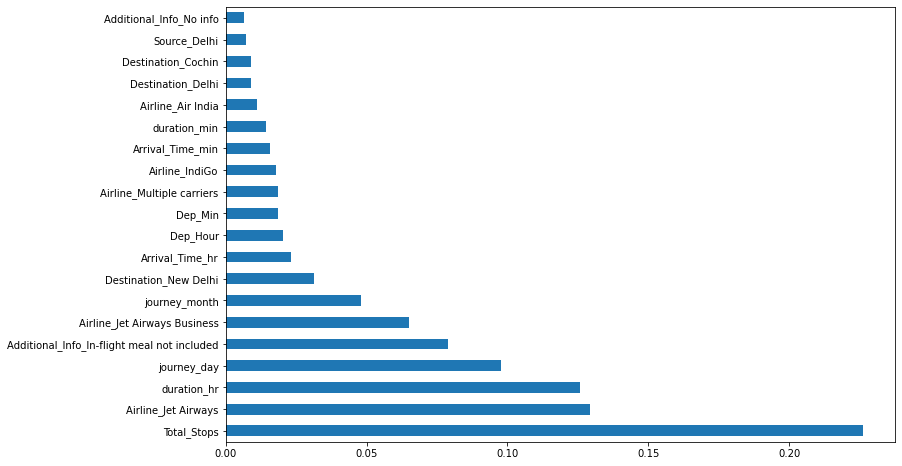

In [96]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [97]:
#Performing the train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [98]:
#Using the RandomForstRegressor Model
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [99]:
#Predicting the value
y_pred = reg_rf.predict(x_test)

In [100]:
#Model Score on training set
reg_rf.score(x_train, y_train)

0.9819516603902828

In [101]:
#Model Score on testing set
reg_rf.score(x_test, y_test)

0.8786269708009159

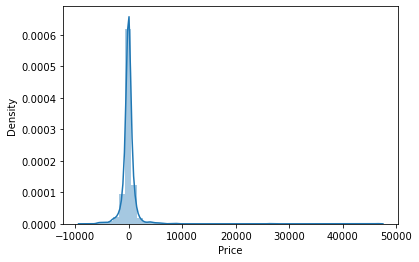

In [102]:
sns.distplot(y_test-y_pred)
plt.show()

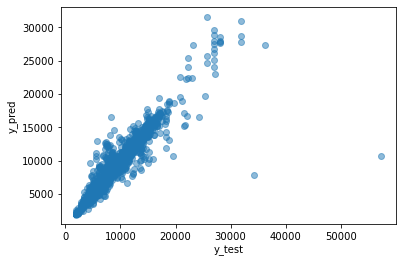

In [103]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [104]:
#ACCURACY OF THE MODEL

In [105]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 635.2446239926169
MSE: 2617052.0918247835
RMSE: 1617.7305374581958


In [106]:
metrics.r2_score(y_test, y_pred)

0.8786269708009159

In [107]:
#Hyper Pramater Tunning

In [108]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [109]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [110]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=4)

In [111]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=  10.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=  10.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=  10.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=  10.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=  10.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   5.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   5.9s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=4, scoring='neg_mean_squared_error', verbose=2)

In [112]:
#Getting the best Parameters
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [113]:
prediction = rf_random.predict(x_test)

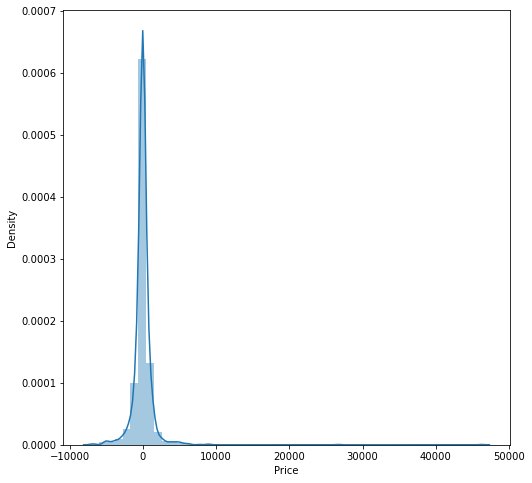

In [114]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

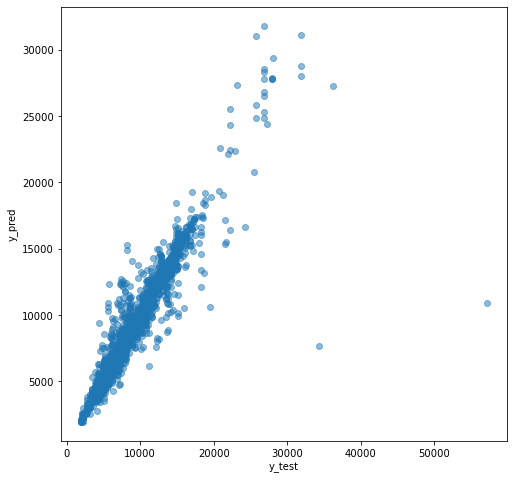

In [115]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [116]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 639.0731730212773
MSE: 2604764.751947751
RMSE: 1613.928360227848


In [117]:
metrics.r2_score(y_test,prediction)

0.8791968301729678

# CONCLUSION
As, the Model is giving a accuracy of 87.85 % in the testing set so we can use this model for the perdiction of unknown data.